In [1]:
import pandas
from wordcloud import WordCloud
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import cmasher as cmr
import colorsys
import matplotlib.colors as mc

In [2]:
textcolor = '#434241' # off black
axescolor = '#858483' # lighter off black
purple = '#be93d4'

style1 = {    
    # Line styles
    'lines.linewidth': 3,
    'lines.antialiased': True,

    # Font
    'text.usetex': True,
    'text.color': textcolor,
    'font.size': 16.0,
    'font.family': 'serif',

    # Axes
    'axes.linewidth': 1.5,
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.labelcolor': textcolor,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': axescolor,

    # Ticks
    'ytick.major.size': 6,
    'ytick.minor.size': 4,
    'ytick.major.width': 1.5,
    'ytick.minor.width': 1.5,
    'ytick.major.pad': 6,
    'ytick.minor.pad': 6,
    'ytick.labelsize': 'medium',
    'ytick.direction': 'in',
    'ytick.right': False,
    'xtick.top': False,
    'xtick.labelcolor': textcolor,
    'ytick.labelcolor': textcolor,
    'xtick.color': axescolor,
    'ytick.color': axescolor,

    # Legend
    'legend.fancybox': True,
    'legend.fontsize': 'large',
    'legend.scatterpoints': 5,
    'legend.loc': 'best',
    'legend.edgecolor': '#b39eb5', #dark purple

    # Figure
    'figure.titlesize': 'large',

    # Images
    'image.cmap': 'magma',
    'image.origin': 'lower',

    # Saving
    'savefig.bbox': 'tight',
    'savefig.format': 'png',
}
plt.style.use(style1)

In [3]:
year = '2024'

In [4]:
def colorrange(nbr_categories, min=0.25):
    nlen = int(nbr_categories-1)
    if nlen > 2 and nlen%2==1:
        nlen+=1
    colorrange = np.sort(np.append(np.linspace(min, 2-min, nlen)[:int(nbr_categories-1)], 
                            np.array([1])))
    return [lighten_color(purple, amount=i) for i in colorrange]
    
def lighten_color(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

# Dwell time

In [5]:
file = "/Users/rlm36AA/Google Drive/Other computers/My MacBook Pro/Uni/Postdoc/Soapbox/"+year+"/Dwell time "+year+" - Sheet1.csv"
df = pandas.read_csv(file)
print(df.keys())

Index(['Start time', 'Group', 'Dwell time', 'Comments'], dtype='object')


## Start time

In [6]:
def time_str_to_float(data):
    for i in range(len(data)):
        hours, minutes = map(int, data[i].split(':'))
        time = hours + (minutes / 60)
        data[i] = hours + (minutes / 60)
    return data

data = list(df['Start time'])
print(data[0], data[-1])
data = time_str_to_float(data)
print(np.min(data), np.max(data))
for i in range(len(data)):
    if data[i]<11:
        data[i]=11
print(np.min(data), np.max(data))

11:01 12:09
10.983333333333333 13.916666666666666
11.0 13.916666666666666


<>:21: SyntaxWarning: invalid escape sequence '\%'
<>:21: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/2925820685.py:21: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel('Percent of counts (\%)')


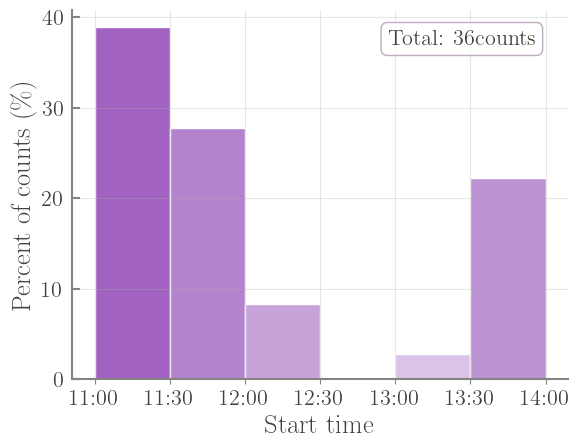

In [7]:
bins = [11, 11.5, 12, 12.5, 13, 13.5, 14]
colors = colorrange(len(bins)-1)
counts = [0]*(len(bins)-1)
for i in range(len(bins)-1):
    for d in data:
        if bins[i]<= d and d<bins[i+1]:
            counts[i] += 1
percentages = np.array(counts) * 100 / len(data)

sorted_indices = np.argsort(percentages)
newcolors = [0]*len(colors)
for i in range(len(colors)):
    newcolors[sorted_indices[i]] = colors[i]

plt.text(12.95, 37, 'Total: {:.0f}counts'.format(np.sum(counts)),
        bbox=dict(boxstyle='round', facecolor='white', edgecolor=plt.rcParams['legend.edgecolor'], alpha=0.85))

plt.bar(bins[:-1]+np.diff(bins)/2, percentages, width=np.diff(bins), color=newcolors, edgecolor='white')
plt.xticks(bins, ['11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00'])
plt.grid(alpha=0.3)
plt.ylabel('Percent of counts (\%)')
plt.xlabel('Start time')
plt.savefig(year+'/D1')

## Group

In [8]:
counter = Counter(list(df['Group']))
[counter[k] for k in counter.keys()], counter

([11, 12, 13], Counter({'AG': 13, 'MG': 12, 'A': 11}))

<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/2503977414.py:5: SyntaxWarning: invalid escape sequence '\%'
  plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=140,


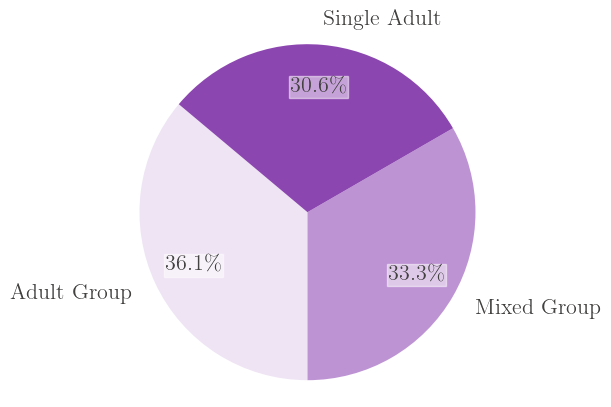

In [9]:
labels = ['Adult Group', 'Mixed Group', 'Single Adult']
counts = np.array([13, 12, 11])
sizes = 100*counts/np.sum(counts)
colors = colorrange(3)
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=140,
        labeldistance=1.15, pctdistance=0.75,
        textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 1, 
                            'alpha':0.5}})
plt.axis('equal')
plt.savefig(year+'/D2')

## Dwell time

<>:36: SyntaxWarning: invalid escape sequence '\%'
<>:36: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/2809070527.py:36: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel('Percentage of audience (\%)')


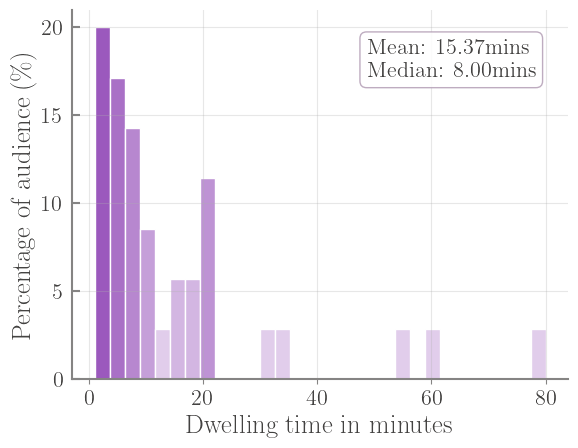

In [10]:
data = list(df['Dwell time'])
data = data[:21]+data[22:]

bins = np.linspace(np.nanmin(data), np.nanmax(data), 30+1)
counts = [0]*(len(bins)-1)
for i in range(len(bins)-1):
    for d in data:
        if bins[i]<= d and d<=bins[i+1]:
            counts[i] += 1
percentages = np.array(counts) * 100 / len(data)

nbr_bins_with_color = len(set(percentages))
colors = colorrange(nbr_bins_with_color)

sorted_indices = np.argsort(percentages)
newcolors = [0]*len(percentages)
j = 0
percentage0 = percentages[sorted_indices[0]]
for i in sorted_indices:
    if percentages[i]!=percentage0:
        j +=1
        percentage0 = percentages[i]
    newcolors[i] = colors[j]

plt.bar(bins[:-1]+np.diff(bins)/2, percentages, width=np.diff(bins), color=newcolors, edgecolor='white')


#counts, bins, patches = plt.hist(data, bins=30, color='#be93d4', edgecolor='white')

# place a text box in upper left in axes coords
plt.text(48.65, 17.2, 'Mean: {:.2f}mins \nMedian: {:.2f}mins'.format(np.nanmean(data), np.nanmedian(data)),
        bbox=dict(boxstyle='round', facecolor='white', edgecolor=plt.rcParams['legend.edgecolor'], alpha=0.85))

plt.grid(alpha=0.3)
plt.xlabel('Dwelling time in minutes')
plt.ylabel('Percentage of audience (\%)')
plt.savefig(year+'/D3')

## Comments

/Users/rlm36AA/.pyenv/versions/3.12.1/lib/python3.12/site-packages/wordcloud/wordcloud.py:585: FutureWarning: Possible set union at position 5
  words = re.findall(regexp, text, flags)


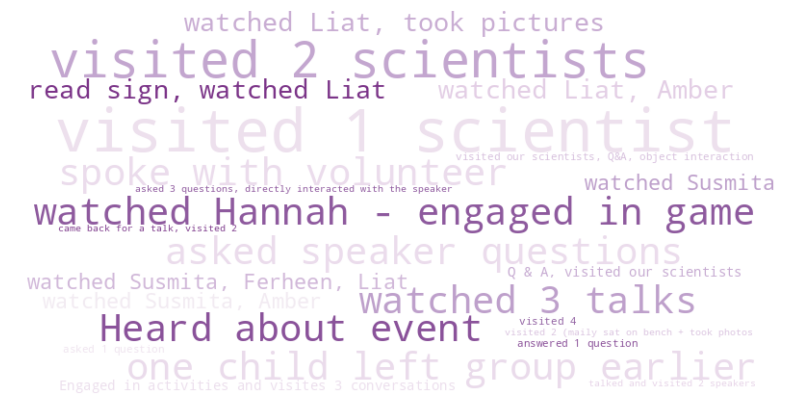

In [9]:
data = list(df['Comments'])
data = [text for text in data if text is not None and not isinstance(text, float)]
special_delimiter = "|||"
text = special_delimiter.join(data)
cmap = cmr.get_sub_cmap('PRGn', 0.07, 0.5)
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap=cmap, prefer_horizontal=1.0, regexp=r'\b[^|||]+\b', collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

In [6]:
data = list(df['Comments'])
data = [text for text in data if text is not None and not isinstance(text, float)]
data

['watched Hannah - engaged in game',
 'Heard about event',
 'watched 3 talks',
 'one child left group earlier',
 'asked speaker questions',
 'spoke with volunteer',
 'read sign, watched Liat',
 'watched Liat, took pictures',
 'watched Liat, Amber',
 'watched Susmita, Ferheen, Liat',
 'watched Susmita',
 'watched Susmita, Amber',
 'Engaged in activities and visites 3 conversations',
 'Q & A, visited our scientists',
 'visited our scientists, Q&A, object interaction',
 'answered 1 question',
 'visited 2 scientists',
 'asked 1 question',
 'visited 1 scientist',
 'visited 1 scientist',
 'visited 4',
 'asked 3 questions, directly interacted with the speaker',
 'visited 2 scientists',
 'visited 1 scientists',
 'visited 2 (maily sat on bench + took photos)',
 'came back for a talk, visited 2',
 'talked and visited 2 speakers ']

# Visitor count

In [12]:
file = "/Users/rlm36AA/Google Drive/Other computers/My MacBook Pro/Uni/Postdoc/Soapbox/"+year+"/Visitor count "+year+" - Sheet1.csv"
df = pandas.read_csv(file)
print(df.keys())

Index(['Time slot', 'Count A', 'Count B'], dtype='object')


In [13]:
total = np.sum(df['Count A']) + np.sum(df['Count B'])

In [14]:
if year == '2024':
    df['Count B'][1] = df['Count B'][0]
    df['Count B'][5] = df['Count B'][4]

/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/2670520928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count B'][1] = df['Count B'][0]
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/2670520928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count B'][5] = df['Count B'][4]


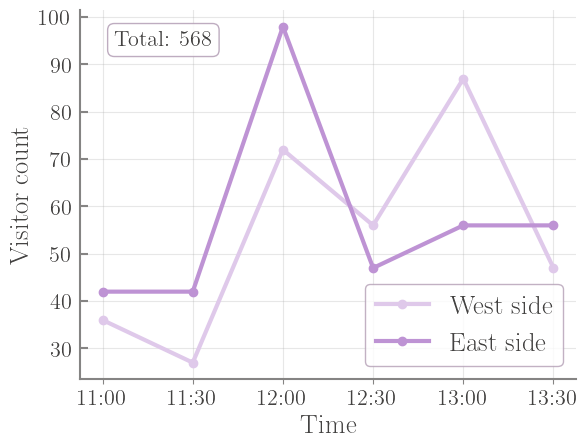

In [15]:
colors = colorrange(2, min=0.5)
plt.plot(df['Time slot'], df['Count A'], marker='o', color=colors[0], label='West side')
plt.plot(df['Time slot'], df['Count B'], marker='o', color=colors[1], label='East side')
plt.grid(alpha=0.3)
plt.text(0.13, 94, 'Total: '+str(int(total)),
        bbox=dict(boxstyle='round', facecolor='white', edgecolor=plt.rcParams['legend.edgecolor'], alpha=0.85))
plt.legend()
plt.xlabel('Time')
plt.ylabel('Visitor count')
plt.savefig(year+'/C')

# Public questionnaire

In [7]:
file = "/Users/rlm36AA/Google Drive/Other computers/My MacBook Pro/Uni/Postdoc/Soapbox/"+year+"/Soapbox evaluation Brighton "+year+" (Responses) - Sheet1.csv"
df = pandas.read_csv(file)
print(df.keys())

Index(['Time', 'Form type',
       '1. Have you been to a Soapbox Science event before?',
       '2. How were you made aware of this event?',
       '3. Did you find the event a welcoming experience?',
       '4. How many of the scientists did you listen to?',
       '5. Tell us something they mentioned that you found interesting',
       '6a. How would you rate your experience of Soapbox Science?',
       '6b. Why have you given this rating?',
       '7a. How effective do you think this event is at promoting women in science?',
       '7b. Why do you think this',
       '8. How often do you attend science-themed events?',
       '9. Are you involved in science in any of the following ways?',
       '10a. As a result of your experience of Soapbox Science, how likely are you to find out more about a subject covered at the event?',
       '10b. As a result of your experience of Soapbox Science, how likely are you to talk to a friend about what you have heard today?',
       '10c. As a re

In [31]:
def ratio_bar(data):
    data = [text for text in list(data) if text is not None and not isinstance(text, float)]
    categories = list(set(data))
    nbr_categories = len(categories)
    colors = colorrange(nbr_categories)

    segments = np.array([np.sum([1 for j in data if j==categories[i]])/len(data) 
                         for i in range(nbr_categories)])
    
    categories = [i for _,i in sorted(zip(segments, categories))]
    segments.sort()
    
    fig, ax = plt.subplots(figsize=(8, 1))
    left = 0
    for i in range(nbr_categories):
        width = segments[i] * 100
        ax.barh([''], width, left=left, color=colors[i], edgecolor='white')
        text_position = left + width / 2
        ax.text(text_position, '', categories[i]+' {:.1f}'.format(segments[i]*100)+'\%', 
                va='center', ha='center', color=textcolor, 
                bbox=dict(boxstyle='round', facecolor='white', edgecolor=plt.rcParams['legend.edgecolor'], alpha=0.85))
        left += width
    plt.axis('off')
    
def ratio_bar_rating(data, min, max, xmin, xmax=-1):
    data = [text for text in list(data) if text is not None]
    categories = [1, 2, 3, 4, 5]
    nbr_categories = len(categories)
    colors = colorrange(nbr_categories)
    color0 = colors[0]
    
    width = 100 / 5
    ratios = np.array([np.sum([1 for j in data if j==categories[i]])/len(data) 
                             for i in range(nbr_categories)])
    colors = [i for _,i in sorted(zip(ratios, colors))]
    categories = [i for _,i in sorted(zip(ratios, categories))]
    ratios.sort()

    
    colors = colorrange(nbr_categories)
    for i in range(nbr_categories-1):
        for j in range(i+1, nbr_categories):
            if ratios[i]==ratios[j]:
                if ratios[i]==0.0:
                    colors[i] = color0
                    colors[j] = color0
                else:
                    avc = tuple([np.average([colors[i][l], colors[j][l]]) for l in range(3)])
                    colors[i] = avc
                    colors[j] = avc
    colors = [i for _,i in sorted(zip(ratios, colors))]
    
    colors = [i for _,i in sorted(zip(categories, colors))]
    ratios = [i for _,i in sorted(zip(categories, ratios))]
    categories.sort()
    
    fig, ax = plt.subplots(figsize=(8, 1))
    ax.text(xmin, '', min, va='center', ha='center', color=textcolor, 
            bbox=dict(boxstyle='round', facecolor='white', 
                      edgecolor=plt.rcParams['legend.edgecolor'], alpha=0.85))
    
    for i in categories:
        i -= 1
        left = i*width
        ax.barh([''], width, left=left, color=colors[i], edgecolor='white')
        ax.text(left + width / 2, '', str(categories[i])+': {:.0f}'.format(ratios[i]*100)+'\%', 
                va='center', ha='center', color=textcolor, 
                bbox=dict(boxstyle='round', facecolor='white', edgecolor=plt.rcParams['legend.edgecolor'], alpha=0.85))

    if xmax<0:
        xmax = 5*width + width / 2
    ax.text(xmax, '', max, va='center', ha='center', color=textcolor, 
            bbox=dict(boxstyle='round', facecolor='white', 
                      edgecolor=plt.rcParams['legend.edgecolor'], alpha=0.85))
    plt.axis('off')

<>:19: SyntaxWarning: invalid escape sequence '\%'
<>:66: SyntaxWarning: invalid escape sequence '\%'
<>:19: SyntaxWarning: invalid escape sequence '\%'
<>:66: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_20328/1133730534.py:19: SyntaxWarning: invalid escape sequence '\%'
  ax.text(text_position, '', categories[i]+' {:.1f}'.format(segments[i]*100)+'\%',
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_20328/1133730534.py:66: SyntaxWarning: invalid escape sequence '\%'
  ax.text(left + width / 2, '', str(categories[i])+': {:.0f}'.format(ratios[i]*100)+'\%',


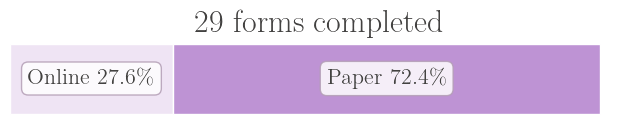

In [18]:
k = 'Form type'
ratio_bar(df[k])
plt.title(str(len(df[k]))+' forms completed')
plt.savefig(year+'/PQ0')

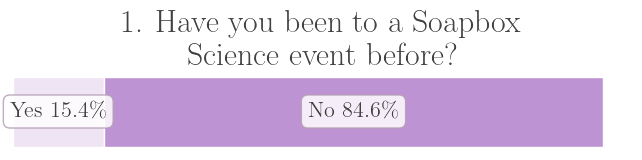

In [19]:
k = '1. Have you been to a Soapbox Science event before?'
ratio_bar(df[k])
plt.title('1. Have you been to a Soapbox \nScience event before?')
plt.savefig(year+'/PQ1')

<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/151463353.py:28: SyntaxWarning: invalid escape sequence '\%'
  plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115,


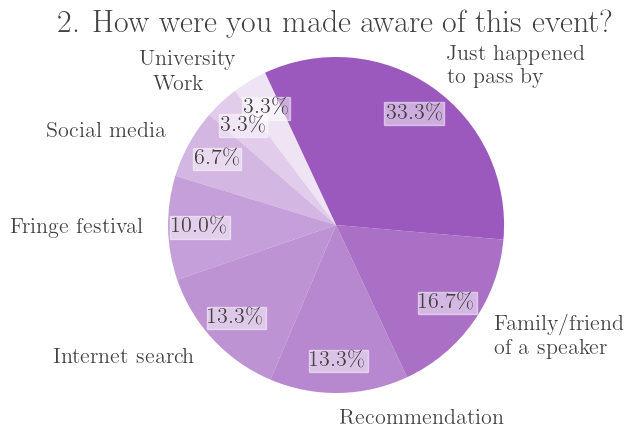

In [20]:
k = '2. How were you made aware of this event?'
data = [i.split(', ') for i in df[k]]
data = [x for xs in data for x in xs]
for i in range(len(data)):
    if '(' in data[i]:
        data[i] = data[i].split(' (')[0]
    if 'From a' in data[i]:
        data[i] = 'Recommendation'
    if 'ringe' in data[i]:
        data[i] = 'Fringe festival'
    if 'Uni' in data[i]:
        data[i] = 'University'
    if '/' in data[i]:
        data[i] = 'Family/friend \nof a speaker'
    if 'work' in data[i]:
        data[i] = 'Work'
    if 'happened' in data[i]:
        data[i] = 'Just happened \n to pass by'
labels = list(set(data))
counts = np.array([np.sum([j==i for j in data]) for i in labels])
sizes = 100*counts/np.sum(counts)
colors = colorrange(len(labels))

labels = [i for _,i in sorted(zip(counts, labels))]
sizes = [i for _,i in sorted(zip(counts, sizes))]
counts.sort()

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115, 
        labeldistance=1.15, pctdistance=0.81,
        textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 1, 
                            'alpha':0.5}})
plt.axis('equal')
plt.title(k)
plt.savefig(year+'/PQ2')
plt.show()

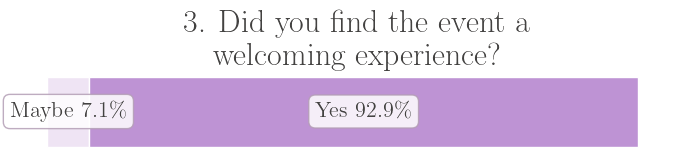

In [21]:
k = '3. Did you find the event a welcoming experience?'
data = df[k]
data = [text for text in list(data) if text is not None and not isinstance(text, float)]
for i in range(len(data)):
    if 'yes' in data[i]:
        data[i]='Yes'
ratio_bar(data)
plt.title('3. Did you find the event a \nwelcoming experience?')
plt.savefig(year+'/PQ3')

<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/541628467.py:23: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel('Percent of answers (\%)')


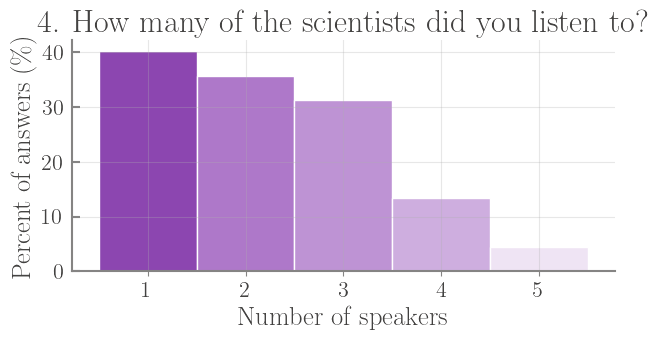

In [22]:
k = '4. How many of the scientists did you listen to?'
data = df[k]
data = [text for text in list(data) if text is not None and not isinstance(text, float)]
for i in range(len(data)):
    for j in range(6):
        if str(j) in data[i]:
            data[i] = str(j)
    if 'All' in data[i]:
        data[i] = '4'

data = [int(i) for i in data]
colors = colorrange(5)
reversed_colors = []
for item in colors:
    reversed_colors.insert(0, item)

plt.subplots(figsize=(7, 3))
counts, bins, patches = plt.hist(data, bins=5, edgecolor='white', density=True)
percentages = counts * 100
plt.bar(bins[:-1], percentages, width=np.diff(bins), color=reversed_colors, edgecolor='white')
plt.grid(alpha=0.3)
plt.xlabel('Number of speakers')
plt.ylabel('Percent of answers (\%)')
plt.xticks(bins[:5], ['1', '2', '3', '4', '5'])
xmin, xmax = plt.xlim()
bin_size = bins[1] - bins[0]
plt.xlim(xmin, xmax - bins[-1] + bins[-2]+(bin_size/2))
plt.title(k)
plt.savefig(year+'/PQ4')

/Users/rlm36AA/.pyenv/versions/3.12.1/lib/python3.12/site-packages/wordcloud/wordcloud.py:585: FutureWarning: Possible set union at position 5
  words = re.findall(regexp, text, flags)


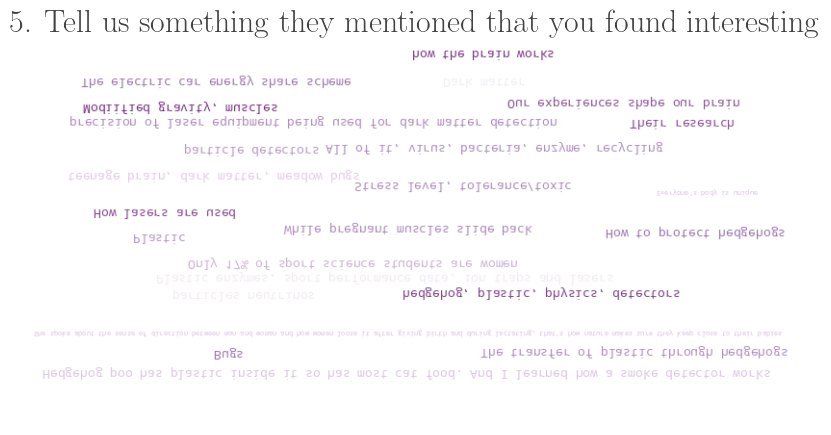

In [9]:
k = '5. Tell us something they mentioned that you found interesting'
data = list(df[k])
data = [text for text in data if text is not None and not isinstance(text, float)]
special_delimiter = "|||"
text = special_delimiter.join(data)
cmap = cmr.get_sub_cmap('PRGn', 0.07, 0.5)
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap=cmap, prefer_horizontal=1.0, regexp=r'\b[^|||]+\b', collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title(k)
plt.show()

In [10]:
print(k)
data

5. Tell us something they mentioned that you found interesting


['Hedgehog poo has plastic inside it so has most cat food. And I learned how a smoke detector works.',
 'Their research',
 'Dark matter',
 'Modiified gravity, muscles',
 'Plastic',
 'Stress level, tolerance/toxic',
 'hedgehog, plastic, physics, detectors',
 'While pregnant muscles slide back',
 'All of it, virus, bacteria, enzyme, recycling',
 'Our experiences shape our brain',
 'Bugs',
 'precision of laser equipment being used for dark matter detection',
 'particles neutrinos',
 'particle detectors',
 'Plastic enzymes, sport performance data, ion traps and lasers',
 'How lasers are used',
 'teenage brain, dark matter, meadow bugs',
 'how the brain works',
 'How to protect hedgehogs. ',
 'The transfer of plastic through hedgehogs ',
 'Only 17% of sport science students are women.',
 'The electric car energy share scheme ',
 'She spoke about the sense of direction between man and woman and how women loose it after giving birth and during lactating, that’s how nature makes sure they keep

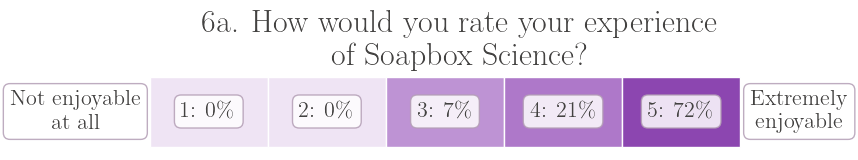

In [23]:
k = '6a. How would you rate your experience of Soapbox Science?'
ratio_bar_rating(df[k], 'Not enjoyable \nat all', 'Extremely \nenjoyable', -12.60)
plt.title('6a. How would you rate your experience \nof Soapbox Science?')
plt.savefig(year+'/PQ6a')

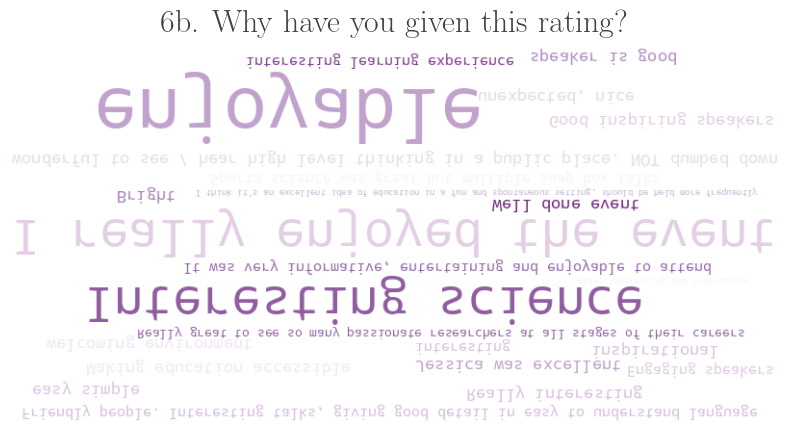

In [11]:
k = '6b. Why have you given this rating?'
data = list(df[k])
data = [text for text in data if text is not None and not isinstance(text, float)]
special_delimiter = "|||"
text = special_delimiter.join(data)
cmap = cmr.get_sub_cmap('PRGn', 0.07, 0.5)
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap=cmap, prefer_horizontal=1.0, regexp=r'\b[^|||]+\b', collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title(k)
plt.show()

In [12]:
print(k)
data

6b. Why have you given this rating?


['I really enjoyed the event',
 'Interesting science',
 'wonderful to see / hear high level thinking in a public place. NOT dumbed down',
 'enjoyable',
 'easy simple',
 'unexpected, nice',
 'Bright',
 'Making education accessible',
 'Good inspiring speakers',
 'Really interesting',
 'Well done event',
 'speaker is good',
 'welcoming environment',
 'inspirational',
 'Jessica was excellent',
 'enjoyable',
 'Friendly people. Interesting talks, giving good detail in easy to understand language',
 'interesting learning experience',
 'interesting',
 'Engaging speakers',
 'It was very informative, entertaining and enjoyable to attend.',
 'Sports science was great but multiple soap box talks ',
 'Really great to see so many passionate researchers at all stages of their careers!',
 'I think it’s an excellent idea of education in a fun and spontaneous setting, should be held more frequently.',
 'It is really interesting and interactive. ']

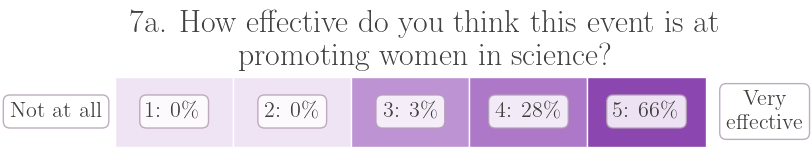

In [24]:
k = '7a. How effective do you think this event is at promoting women in science?'
ratio_bar_rating(df[k], 'Not at all', 'Very \neffective', -10)
plt.title('7a. How effective do you think this event is at \npromoting women in science?')
plt.savefig(year+'/PQ7a')

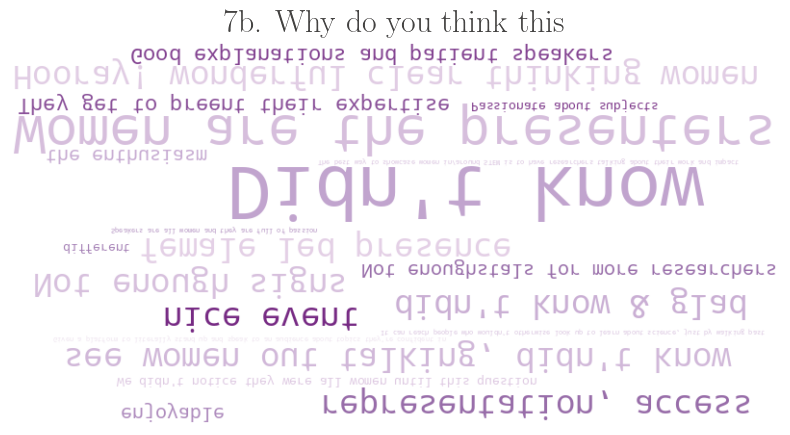

In [13]:
k = '7b. Why do you think this'
data = list(df[k])
data = [text for text in data if text is not None and not isinstance(text, float)]
special_delimiter = "|||"
text = special_delimiter.join(data)
cmap = cmr.get_sub_cmap('PRGn', 0.07, 0.5)
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap=cmap, prefer_horizontal=1.0, regexp=r'\b[^|||]+\b', collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title(k)
plt.show()

In [14]:
print(k)
data

7b. Why do you think this


['Women are the presenters',
 'Hooray! wonderful clear thinking women',
 'female led presence',
 " didn't know & glad",
 "see women out talking, didn't know",
 'representation, access',
 'nice event',
 'Not enough signs',
 'Good explanations and patient speakers',
 "Didn't know",
 'They get to preent their expertise',
 'Not enoughstals for more researchers',
 'the enthusiasm',
 'enjoyable',
 "We didn't notice they were all women until this question!!",
 "Didn't know",
 'different',
 'Passionate about subjects.',
 "Given a platform to literally stand up and speak to an audience about topics they're confident in.",
 'The best way to showcase women in/around STEM is to have researchers talking about their work and impact',
 'It can reach people who wouldn’t otherwise look up to learn about science, just by walking past',
 'Speakers are all women and they are full of passion. ']

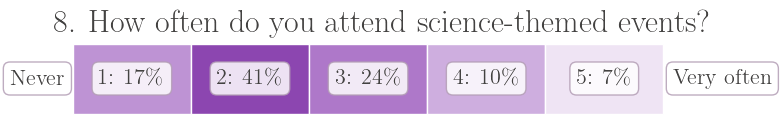

In [25]:
k = '8. How often do you attend science-themed events?'
ratio_bar_rating(df[k], 'Never', 'Very often', -6)
plt.title(k)
plt.savefig(year+'/PQ8')

<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/1254184444.py:23: SyntaxWarning: invalid escape sequence '\%'
  plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115,


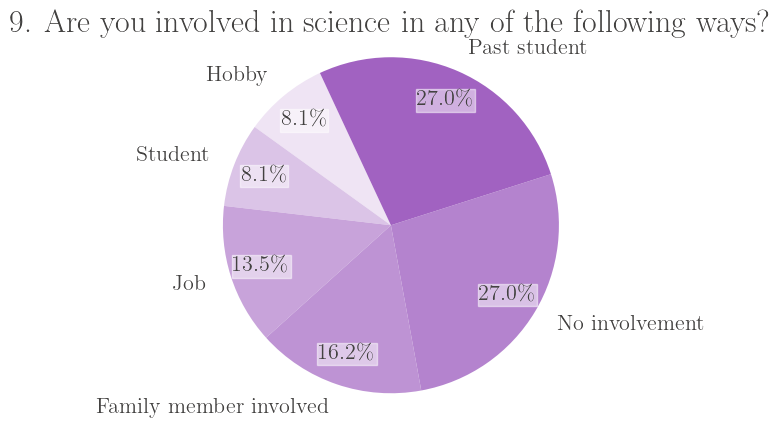

In [44]:
k = '9. Are you involved in science in any of the following ways?'
data = list(df[k])
data = [i.split(', ') for i in data]
data = [x for xs in data for x in xs]
data = data[:2]+data[3:]
for i in range(len(data)):
    if 'Not' in data[i]:
        data[i] = 'No involvement'
    if 'amily' in data[i]:
        data[i] = 'Family member involved'
    if 'ast stude' in data[i]:
        data[i] = 'Past student'

labels = list(set(data))
counts = np.array([np.sum([j==i for j in data]) for i in labels])
sizes = 100*counts/np.sum(counts)
colors = colorrange(len(labels))

labels = [i for _,i in sorted(zip(counts, labels))]
sizes = [i for _,i in sorted(zip(counts, sizes))]
counts.sort()

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115, 
        labeldistance=1.15, pctdistance=0.81,
        textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 1, 
                            'alpha':0.5}})
plt.axis('equal')
plt.title(k)
plt.savefig(year+'/PQ9')
plt.show()

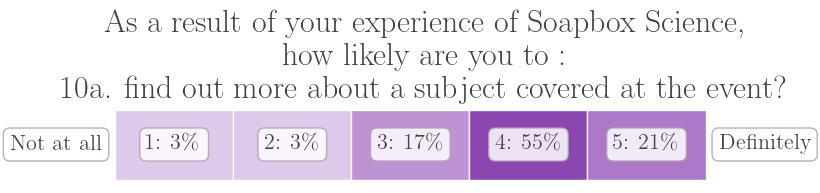

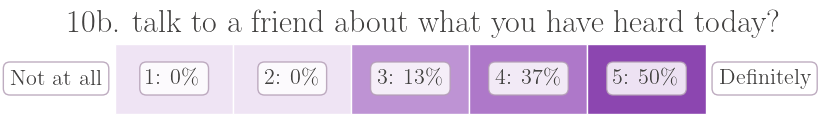

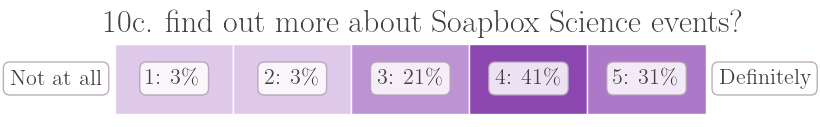

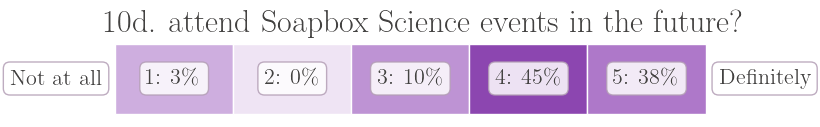

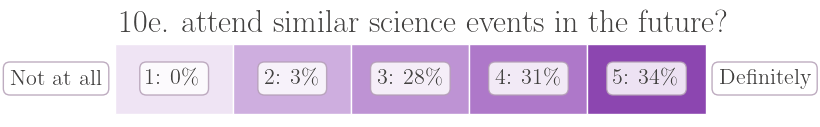

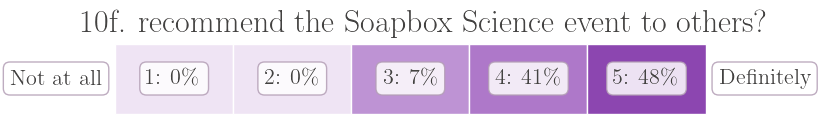

In [27]:
xmin = -10
k = '10a. As a result of your experience of Soapbox Science, how likely are you to find out more about a subject covered at the event?'
ratio_bar_rating(df[k], 'Not at all', 'Definitely', xmin)
k = k.split('As a result of your experience of Soapbox Science, how likely are you to')
k = 'As a result of your experience of Soapbox Science, \nhow likely are you to :\n'+k[0]+k[1]
plt.title(k)
plt.savefig(year+'/PQ10a')

k = '10b. As a result of your experience of Soapbox Science, how likely are you to talk to a friend about what you have heard today?'
data = [i.split(',') for i in df[k]]
data = [int(x) for xs in data for x in xs]
ratio_bar_rating(data, 'Not at all', 'Definitely', xmin)
k = k.split('As a result of your experience of Soapbox Science, how likely are you to')
k = k[0]+k[1]
plt.title(k)
plt.savefig(year+'/PQ10b')

k = '10c. As a result of your experience of Soapbox Science, how likely are you to find out more about Soapbox Science events?'
ratio_bar_rating(df[k], 'Not at all', 'Definitely', xmin)
k = k.split('As a result of your experience of Soapbox Science, how likely are you to')
k = k[0]+k[1]
plt.title(k)
plt.savefig(year+'/PQ10c')

k = '10d. As a result of your experience of Soapbox Science, how likely are you to attend Soapbox Science events in the future?'
ratio_bar_rating(df[k], 'Not at all', 'Definitely', xmin)
k = k.split('As a result of your experience of Soapbox Science, how likely are you to')
k = k[0]+k[1]
plt.title(k)
plt.savefig(year+'/PQ10d')

k = '10e. As a result of your experience of Soapbox Science, how likely are you to attend similar science events in the future?'
ratio_bar_rating(df[k], 'Not at all', 'Definitely', xmin)
k = k.split('As a result of your experience of Soapbox Science, how likely are you to')
k = k[0]+k[1]
plt.title(k)
plt.savefig(year+'/PQ10e')

k = '10f. As a result of your experience of Soapbox Science, how likely are you to recommend the Soapbox Science event to others?'
ratio_bar_rating(df[k], 'Not at all', 'Definitely', xmin)
k = k.split('As a result of your experience of Soapbox Science, how likely are you to')
k = k[0]+k[1]
plt.title(k)
plt.savefig(year+'/PQ10f')

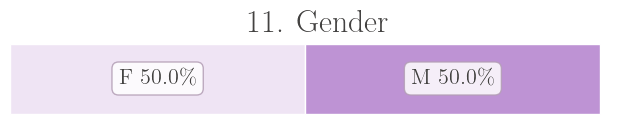

In [28]:
k = '11. Gender'
data = df[k]
data = [text for text in list(data) if text is not None and not isinstance(text, float)]
data = [i.split(' + ') for i in data]
data = [x for xs in data for x in xs]
for i in range(len(data)):
    if len(list(data[i]))>1:
        data[i] = [list(data[i])[1]]*int(list(data[i])[0])
data = [x for xs in data for x in xs]
ratio_bar(data)
plt.title(k)
plt.savefig(year+'/PQ11')

<>:27: SyntaxWarning: invalid escape sequence '\%'
<>:27: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/2203552242.py:27: SyntaxWarning: invalid escape sequence '\%'
  plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115,


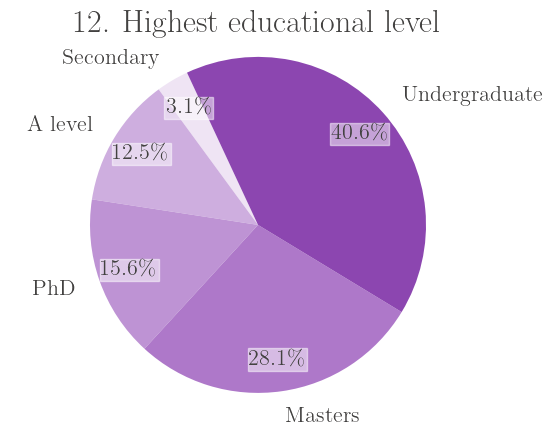

In [29]:
k = '12. Highest educational level'
data = list(df[k])
data = [text for text in data if text is not None and not isinstance(text, float)]
data = [i.split(', ') for i in data]
data = [x for xs in data for x in xs]
for i in range(len(data)):
    if 'BSc' in data[i]:
        data[i] = 'Undergraduate'
    if 'Enginee' in data[i]:
        data[i] = 'Undergraduate'
    if 'college' in data[i]:
        data[i] = 'A level'
    if 'Teacher training' in data[i]:
        data[i] = 'Masters'
data = [text for text in data if text!='Prefer not to say']
data = [text for text in data if text!='Other']
        
labels = list(set(data))
counts = np.array([np.sum([j==i for j in data]) for i in labels])
sizes = 100*counts/np.sum(counts)
colors = colorrange(len(labels))

labels = [i for _,i in sorted(zip(counts, labels))]
sizes = [i for _,i in sorted(zip(counts, sizes))]
counts.sort()

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115, 
        labeldistance=1.15, pctdistance=0.81,
        textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 1, 
                            'alpha':0.5}})
plt.axis('equal')
plt.title(k)
plt.savefig(year+'/PQ12')
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/1748446262.py:17: SyntaxWarning: invalid escape sequence '\%'
  plt.pie(sizes, labels=labels, colors=newcolors, autopct="%1.1f\%%", startangle=15,


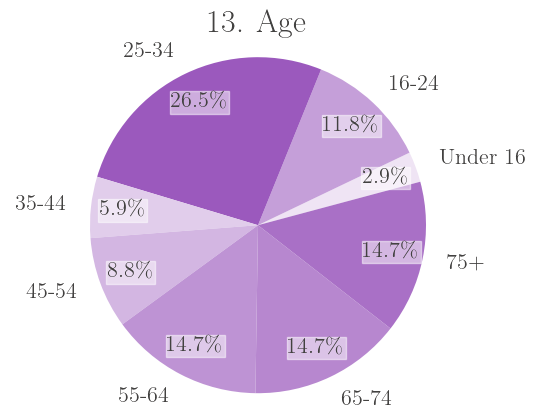

In [30]:
k = '13. Age'
data = list(df[k])
data = [text for text in data if text is not None and not isinstance(text, float)]
data = [i.split(', ') for i in data]
data = [x for xs in data for x in xs]

labels = ['Under 16', '16-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
counts = np.array([np.sum([j==i for j in data]) for i in labels])
sizes = 100*counts/np.sum(counts)
colors = colorrange(len(labels))

sorted_indices = np.argsort(sizes)
newcolors = [0]*len(colors)
for i in range(len(colors)):
    newcolors[sorted_indices[i]] = colors[i]

plt.pie(sizes, labels=labels, colors=newcolors, autopct="%1.1f\%%", startangle=15, 
        labeldistance=1.15, pctdistance=0.81,
        textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 1, 
                            'alpha':0.5}})
plt.axis('equal')
plt.title(k)
plt.savefig(year+'/PQ13')
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/4149984102.py:18: SyntaxWarning: invalid escape sequence '\%'
  plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115,


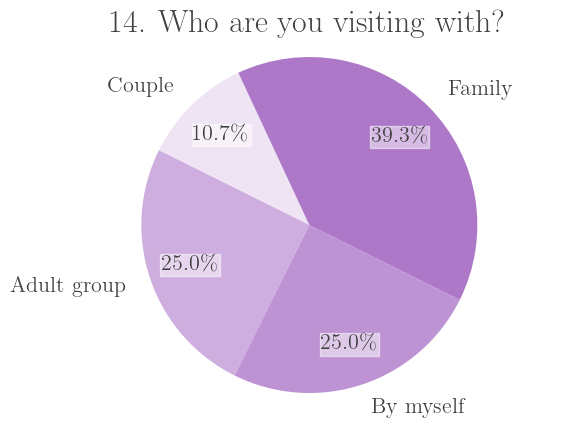

In [31]:
k = '14. Who are you visiting with?'
data = df[k]
data = [text for text in list(data) if text is not None and not isinstance(text, float)]
for i in range(len(data)):
    if 'artner' in data[i]:
        data[i] = 'Couple'
    if 'irlfriend' in data[i]:
        data[i] = 'Couple'
labels = list(set(data))
counts = np.array([np.sum([j==i for j in data]) for i in labels])
sizes = 100*counts/np.sum(counts)
colors = colorrange(len(labels))

labels = [i for _,i in sorted(zip(counts, labels))]
sizes = [i for _,i in sorted(zip(counts, sizes))]
counts.sort()

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115, 
        labeldistance=1.15, pctdistance=0.75,
        textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 1, 
                            'alpha':0.5}})
plt.axis('equal')
plt.title(k)
plt.savefig(year+'/PQ14')
plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\%'
<>:42: SyntaxWarning: invalid escape sequence '\%'
<>:37: SyntaxWarning: invalid escape sequence '\%'
<>:42: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/2949176838.py:37: SyntaxWarning: invalid escape sequence '\%'
  plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115,
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_52928/2949176838.py:42: SyntaxWarning: invalid escape sequence '\%'
  text = ['Others, each {:.1f}\%\n'.format(100/totallen)]+[i for i in otherdata]


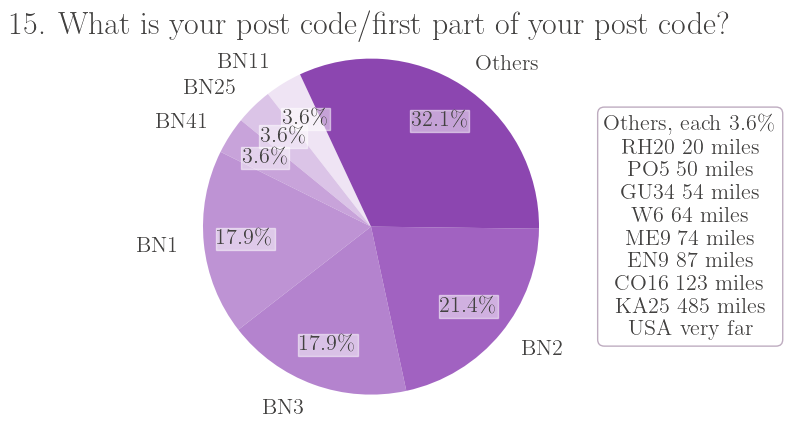

In [32]:
k = '15. What is your post code/first part of your post code?'
data = df[k]
data = [text for text in list(data) if text is not None and not isinstance(text, float)]
for i in range(len(data)):
    if 'n' in data[i]:
        data[i] = data[i].replace('n', 'N')
    if 'W68JN' in data[i]:
        data[i] = 'W6'
    if 'KA257EA' in data[i]:
        data[i] = 'KA25'
    if 'ME97DZ' in data[i]:
        data[i] = 'ME9'
    if 'BN4' in data[i]:
        data[i] = 'BN41'
    if 'US' in data[i]:
        data[i] = 'USA'
    if 'NB2' in data[i]:
        data[i] = 'BN2'
data = [i.split(' ')[0] for i in data]

BNdata = [i if 'BN' in i else 'Others' for i in data]
otherdata = [i for i in data if i not in BNdata]
otherdata = ['RH20 20 miles \n', 'PO5 50 miles \n', 'GU34 54 miles \n', 'W6 64 miles \n', 'ME9 74 miles \n', 
             'EN9 87 miles \n', 'CO16 123 miles \n', 'KA25 485 miles \n', 'USA very far']
totallen = len(data)

data = BNdata
labels = list(set(data))
counts = np.array([np.sum([j==i for j in data]) for i in labels])
sizes = 100*counts/totallen
colors = colorrange(len(labels))

labels = [i for _,i in sorted(zip(counts, labels))]
sizes = [i for _,i in sorted(zip(counts, sizes))]
counts.sort()

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115, 
        labeldistance=1.15, pctdistance=0.75,
        textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 1, 
                            'alpha':0.5}})

text = ['Others, each {:.1f}\%\n'.format(100/totallen)]+[i for i in otherdata]
text = ''.join(text)
plt.text(1.9, 0.0, text, va='center', ha='center', color=textcolor, 
            bbox=dict(boxstyle='round', facecolor='white', 
                      edgecolor=plt.rcParams['legend.edgecolor'], alpha=0.85))
plt.axis('equal')
plt.title(k)
plt.savefig(year+'/PQ15')
plt.show()

# Speaker questionnaire

In [5]:
file = "/Users/rlm36AA/Google Drive/Other computers/My MacBook Pro/Uni/Postdoc/Soapbox/"+year+"/Soapbox speaker evaluation Brighton "+year+" (Responses) - Form responses 1.csv"
df = pandas.read_csv(file)
print(df.keys())

Index(['Timestamp', '1. How did you hear about Soapbox Science?',
       '2a. Had you attended a Soapbox Science event prior to applying to become a speaker? ',
       '2b. If Yes, please give details of which location and in what capacity e.g. Participant/Volunteer/Audience member',
       '3. What was your main motivation for applying to be a Soapbox Science speaker?',
       '4. How supported did you feel by the Soapbox Science Brighton organising committee in the lead up to the event?',
       '5. How did you find the level of communication between yourself and the Brighton organising committee prior to the event?',
       '6. How useful would you rate the training sessions?',
       '7. How supported did you feel by the organising committee and volunteers on the day of the event?',
       '8. Is there anything the organising committee could have done to help make you feel more prepared for the event?',
       '9. How enjoyable did you find the event?',
       '10. How would you ra

<>:18: SyntaxWarning: invalid escape sequence '\%'
<>:18: SyntaxWarning: invalid escape sequence '\%'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_20328/2153779679.py:18: SyntaxWarning: invalid escape sequence '\%'
  plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115,
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_20328/2153779679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = 'Recommended via \n friends/colleagues'
/var/folders/qw/k_c451h55_346t71454cl33h0000gq/T/ipykernel_20328/2153779679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] 

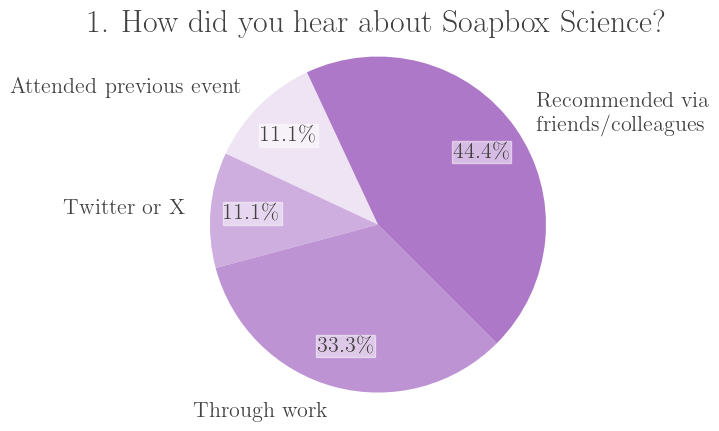

In [70]:
k = '1. How did you hear about Soapbox Science?'
data = df[k]

for i in range(len(data)):
    if 'Recommended' in data[i]:
        data[i] = 'Recommended via \n friends/colleagues'


labels = list(set(data))
counts = np.array([np.sum([j==i for j in data]) for i in labels])
sizes = 100*counts/np.sum(counts)
colors = colorrange(len(labels))

labels = [i for _,i in sorted(zip(counts, labels))]
sizes = [i for _,i in sorted(zip(counts, sizes))]
counts.sort()

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f\%%", startangle=115, 
        labeldistance=1.15, pctdistance=0.75,
        textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 1, 
                            'alpha':0.5}})
plt.axis('equal')
plt.title(k)
plt.savefig(year+'/SQ1')
plt.show()

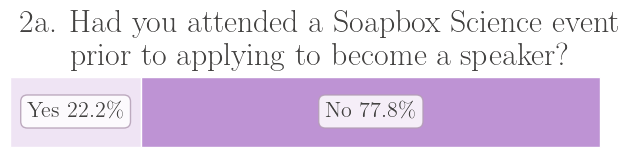

In [71]:
k = '2a. Had you attended a Soapbox Science event prior to applying to become a speaker? '
data = df[k]
ratio_bar(data)
plt.title('2a. Had you attended a Soapbox Science event \n prior to applying to become a speaker?')
plt.savefig(year+'/SQ2a')

In [72]:
k = '2b. If Yes, please give details of which location and in what capacity e.g. Participant/Volunteer/Audience member'
data = df[k]
data = [text for text in list(data) if text is not None and not isinstance(text, float)]
print(data)

['2023 Soapbox Science Brighton as a Volunteer ', 'I attended the 2023 Brighton Soapbox science event as a volunteer']


In [73]:
k = '3. What was your main motivation for applying to be a Soapbox Science speaker?'
data = list(df[k])
print(data)

['I share information about my work', "I love talking about my research and think it's something that's not really thought about much in the general public's concious. I think science is worth talking about", 'I wanted to do more outreach and liked the concept of Soapbox Science', 'To promote women in STEM', 'I enjoy engaging the public with my research and general insect/ conservation research. ', 'I really love outreach and think it is really important and rewarding to share research with the public', 'I am very passionate about increasing female representation in STEM, particularly sport science, and I felt that Soapbox would be a platform that would allow me to promote and exercise this passion ', 'A colleague had done it previously, and I enjoy outreach ', 'To get engaged in a really fun interactive event that bring the science I do in an accessible way out from the lab into the world, and show casing women scientists ']


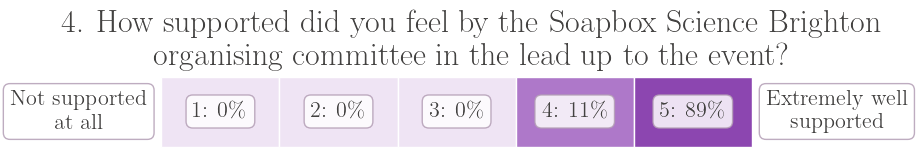

In [74]:
k = '4. How supported did you feel by the Soapbox Science Brighton organising committee in the lead up to the event?'
ratio_bar_rating(df[k], 'Not supported \n at all', 'Extremely well \n supported', -14, xmax = 114.4)
plt.title('4. How supported did you feel by the Soapbox Science Brighton \n organising committee in the lead up to the event?')
plt.savefig(year+'/SQ4')

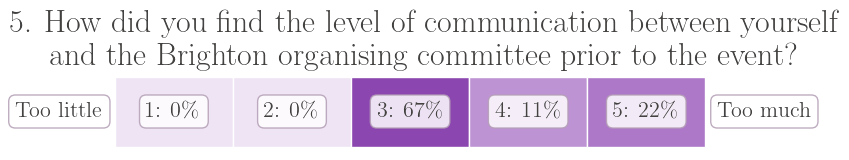

In [75]:
k = '5. How did you find the level of communication between yourself and the Brighton organising committee prior to the event?'
ratio_bar_rating(df[k], 'Too little', 'Too much', -9.4)
plt.title('5. How did you find the level of communication between yourself \n and the Brighton organising committee prior to the event?')
plt.savefig(year+'/SQ5')

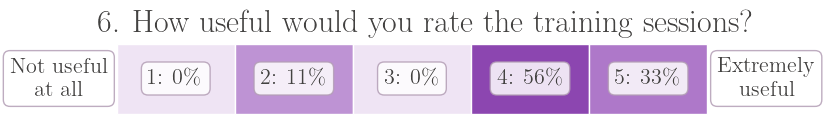

In [76]:
k = '6. How useful would you rate the training sessions?'
ratio_bar_rating(df[k], 'Not useful \n at all', 'Extremely \n useful', -9.8)
plt.title(k)
plt.savefig(year+'/SQ6')

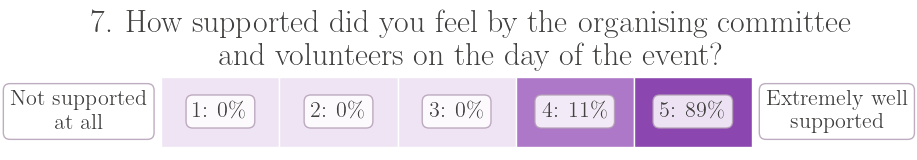

In [77]:
k = '7. How supported did you feel by the organising committee and volunteers on the day of the event?'
ratio_bar_rating(df[k], 'Not supported \n at all', 'Extremely well \n supported', -14, xmax = 114.4)
plt.title('7. How supported did you feel by the organising committee \n and volunteers on the day of the event?')
plt.savefig(year+'/SQ7')

In [60]:
k = '8. Is there anything the organising committee could have done to help make you feel more prepared for the event?'
data = list(df[k])
data = [text for text in list(data) if text is not None and not isinstance(text, float)]
print(data)

["Maybe it varies too much year to year but I'd definitely prepared to speak to mostly children and then ended up with mostly adults. It was easy to adapt but it would be good to know the kind of demographic that normally comes along.", 'No', 'No', "I wasn't able to attend the training session where you present your work, but still received suitable feedback. I think what would have been nice is also to get feedback from one of the other speakers if you can't attend that session, but other than that felt very well supported.", 'No, it was very well organised!', 'No, you were amazing!']


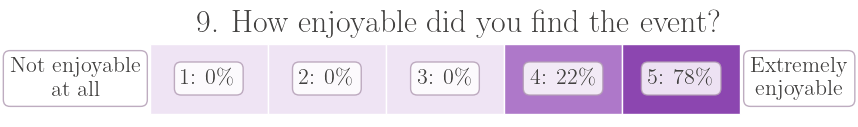

In [78]:
k = '9. How enjoyable did you find the event?'
ratio_bar_rating(df[k], 'Not enjoyable \nat all', 'Extremely \nenjoyable', -12.60)
plt.title(k)
plt.savefig(year+'/SQ9')

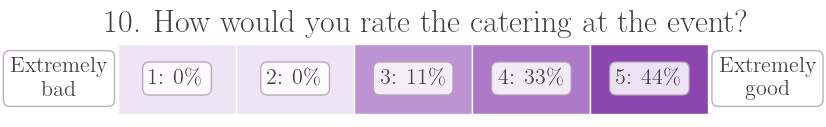

In [79]:
k = '10. How would you rate the catering at the event?'
ratio_bar_rating(df[k], 'Extremely \n bad', 'Extremely \n good', -10)
plt.title(k)
plt.savefig(year+'/SQ10')

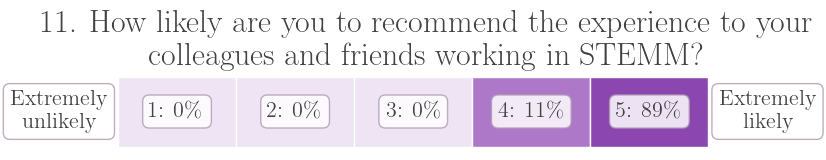

In [80]:
k = '11. How likely are you to recommend the experience to your colleagues and friends working in STEMM?'
ratio_bar_rating(df[k], 'Extremely \n unlikely', 'Extremely \n likely', -10)
plt.title('11. How likely are you to recommend the experience to your \ncolleagues and friends working in STEMM?')
plt.savefig(year+'/SQ11')

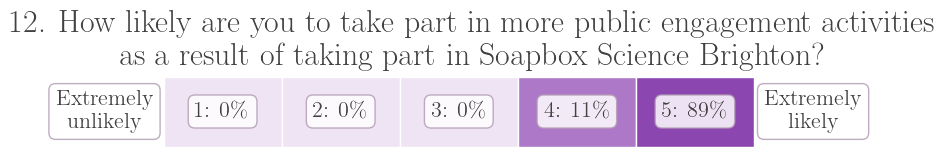

In [81]:
k = '12. How likely are you to take part in more public engagement activities as a result of taking part in Soapbox Science Brighton?'
ratio_bar_rating(df[k], 'Extremely \n unlikely', 'Extremely \n likely', -10)
plt.title('12. How likely are you to take part in more public engagement activities \nas a result of taking part in Soapbox Science Brighton?')
plt.savefig(year+'/SQ12')

In [69]:
k = '13. Any other comments that will help improve the event for the future Soapboxers?'
data = list(df[k])
data = [text for text in list(data) if text is not None and not isinstance(text, float)]
print(data)

['The first training session felt a little long. As we were all women in STEM it felt a bit redundant to have a whole section explaining about the challenges of women in STEM. Maybe that part could have been a document to read later because it was useful to know some stats it just seemed to take a lot of time. ', 'A really well run event which I thoroughly enjoyed, well done team! ', 'It was a really lovely event! Maybe just more eye catching things on the day to bring the public over, maybe even make it longer?']
